## Packages

In [1]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Paths

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/database-crm/database_crm.xlsx


In [3]:
# _path = os.getcwd()
# _file = 'Exercicio_Python_CRM.xlsx'
_path_file = os.path.join(dirname, filename)
_path_file


'/kaggle/input/database-crm/database_crm.xlsx'

## Leituras

In [4]:
_df_transacoes = pd.read_excel(io=_path_file, sheet_name='Transações')
_df_produto = pd.read_excel(io=_path_file, sheet_name='Produto')
_df_lojas = pd.read_excel(io=_path_file, sheet_name='Lojas')
_df_cliente = pd.read_excel(io=_path_file, sheet_name='Cliente')

## Limpando dados.

In [5]:
lista_variables = [_df_transacoes, _df_produto, _df_lojas, _df_cliente]
name_variables = ['_df_transacoes', '_df_produto', '_df_lojas', '_df_cliente']

for i in range(0, len(lista_variables) ):
    _cols = [col.strip().lower() for col in lista_variables[i].columns]
    lista_variables[i].columns = _cols
    lista_variables[i].name = name_variables[i]
    print(f"{lista_variables[i].head(2)}")
    print(f"{lista_variables[i].dtypes}")

   id_trans       data  id_loja  id_produto  id_cliente  unidadesvendidas  \
0         1 2022-01-01        7      123005       90023                 2   
1         2 2022-01-01        9      123004       90092                 1   

   valortotal  promo  
0       99.98    0.0  
1       35.99    0.0  
id_trans                     int64
data                datetime64[ns]
id_loja                      int64
id_produto                   int64
id_cliente                   int64
unidadesvendidas             int64
valortotal                 float64
promo                      float64
dtype: object
   id_produto        descrição produto categoria    cor   marca
0      123000  Bottom Azul Marca AlfaX    Bottom   Azul   AlfaX
1      123001   Top Cinza Marca GammaZ       Top  Cinza  GammaZ
id_produto            int64
descrição produto    object
categoria            object
cor                  object
marca                object
dtype: object
   id_loja  uf        regiao
0        1  AM         NORTE
1

In [6]:
_cols_id_transacoes = [x for x in _df_transacoes.columns if x.startswith('id')]
_cols_id_produto = [x for x in _df_produto.columns if x.startswith('id')]
_cols_id_lojas = [x for x in _df_lojas.columns if x.startswith('id')]
_cols_id_cliente = [x for x in _df_cliente.columns if x.startswith('id') ]
_cols_id_cliente = [x for x in _df_cliente.columns if x.endswith('id') ]

print(f"{_cols_id_transacoes}\n\n{_cols_id_produto}\n\n{_cols_id_lojas}\n\n{_cols_id_cliente}")


['id_trans', 'id_loja', 'id_produto', 'id_cliente']

['id_produto']

['id_loja']

['customerid']


In [7]:
for x in _cols_id_transacoes:
    _df_transacoes[x] = _df_transacoes[x].astype(str)

for x in _cols_id_produto:
    _df_produto[x] = _df_produto[x].astype(str)

for x in _cols_id_lojas:
    _df_lojas[x] = _df_lojas[x].astype(str)

for x in _cols_id_cliente:
    _df_cliente[x] = _df_cliente[x].astype(str)


for df in lista_variables:
    for col in df.columns:
        if df[col].dtypes == object:
            # print(f"Passei por aqui: {col} {df[col].dtypes}")
            df[col] = df[col].str.strip()


    print(f"{df.name}\n")
    print(f"{df.dtypes}\n")
    print(f"{df.info()}\n")
    print(f"{df.describe()}\n")


_df_transacoes

id_trans                    object
data                datetime64[ns]
id_loja                     object
id_produto                  object
id_cliente                  object
unidadesvendidas             int64
valortotal                 float64
promo                      float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_trans          7791 non-null   object        
 1   data              7791 non-null   datetime64[ns]
 2   id_loja           7791 non-null   object        
 3   id_produto        7791 non-null   object        
 4   id_cliente        7791 non-null   object        
 5   unidadesvendidas  7791 non-null   int64         
 6   valortotal        7791 non-null   float64       
 7   promo             7775 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int6

In [8]:
_df_transacoes.fillna(0)

,id_trans,data,id_loja,id_produto,id_cliente,unidadesvendidas,valortotal,promo
0,1,2022-01-01,7,123005,90023,2,99.98,0.0
1,2,2022-01-01,9,123004,90092,1,35.99,0.0
2,3,2022-01-01,1,123001,90027,2,51.98,0.0
3,4,2022-01-01,3,123001,90097,2,51.98,0.0
4,5,2022-01-01,4,123004,90089,2,71.98,0.0
...,...,...,...,...,...,...,...,...
7786,7787,2023-09-30,6,123002,90040,1,27.99,0.0
7787,7788,2023-09-30,8,123009,90027,2,179.98,0.0
7788,7789,2023-09-30,2,123006,90033,2,109.98,0.0
7789,7790,2023-09-30,7,123010,90038,2,179.98,0.0


## Na tabela de transações temos 16 valores faltantes na coluna promoção e valores duplicados.

iremos considerar 0 para os valores faltantes neste dataframe asumindo que não houve promoção para estes casos.

In [9]:
_df_transacoes = _df_transacoes.rename({'unidadesvendidas':'unidades_vendidas', 'valortotal':'valor_total'}, axis=1)

In [10]:
_df_transacoes['promo'] = _df_transacoes['promo'].fillna(0)

In [11]:
_df_transacoes.drop_duplicates()

,id_trans,data,id_loja,id_produto,id_cliente,unidades_vendidas,valor_total,promo
0,1,2022-01-01,7,123005,90023,2,99.98,0.0
1,2,2022-01-01,9,123004,90092,1,35.99,0.0
2,3,2022-01-01,1,123001,90027,2,51.98,0.0
3,4,2022-01-01,3,123001,90097,2,51.98,0.0
4,5,2022-01-01,4,123004,90089,2,71.98,0.0
...,...,...,...,...,...,...,...,...
7786,7787,2023-09-30,6,123002,90040,1,27.99,0.0
7787,7788,2023-09-30,8,123009,90027,2,179.98,0.0
7788,7789,2023-09-30,2,123006,90033,2,109.98,0.0
7789,7790,2023-09-30,7,123010,90038,2,179.98,0.0


In [12]:
_df_transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_trans           7791 non-null   object        
 1   data               7791 non-null   datetime64[ns]
 2   id_loja            7791 non-null   object        
 3   id_produto         7791 non-null   object        
 4   id_cliente         7791 non-null   object        
 5   unidades_vendidas  7791 non-null   int64         
 6   valor_total        7791 non-null   float64       
 7   promo              7791 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 487.1+ KB


In [13]:
_df_produto = _df_produto.rename({'descrição produto':'descrição_produto', }, axis=1)

In [14]:
_df_produto.drop_duplicates()

,id_produto,descrição_produto,categoria,cor,marca
0,123000,Bottom Azul Marca AlfaX,Bottom,Azul,AlfaX
1,123001,Top Cinza Marca GammaZ,Top,Cinza,GammaZ
2,123002,Bottom Preto Marca BetaY,Bottom,Preto,BetaY
3,123003,Top Marca BetaY,Top,Vermelho,BetaY
4,123004,Top Cinza Marca BetaY,Top,Cinza,BetaY
5,123005,Top Cinza Marca AlfaX,Top,Cinza,AlfaX
6,123006,Bottom Preto Marca AlfaX,Bottom,Preto,AlfaX
7,123007,Top Marca AlfaX,Top,Vermelho,AlfaX
8,123008,Top Marca GammaZ,Top,Vermelho,GammaZ
9,123009,Top Marca GammaZ,Top,Vermelho,GammaZ


In [15]:
_df_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_produto         12 non-null     object
 1   descrição_produto  12 non-null     object
 2   categoria          12 non-null     object
 3   cor                12 non-null     object
 4   marca              12 non-null     object
dtypes: object(5)
memory usage: 608.0+ bytes


Tratando valores faltantes da tabela lojas na coluna região

In [16]:
_df_lojas

,id_loja,uf,regiao
0,1,AM,NORTE
1,2,MG,CENTRO-OESTE
2,3,SP,SUDESTE
3,4,SP,NaN
4,5,SP,SUDESTE
5,6,SP,SUDESTE
6,7,RS,SUL
7,8,RS,SUL
8,9,BH,NORDESTE
9,10,BH,NaN


In [17]:
_df_lojas['regiao'] = np.where(_df_lojas['uf']=='SP', 'SUDESTE' , np.where(_df_lojas['uf']=='BH', 'NORDESTE' , _df_lojas['regiao']))
_df_lojas

,id_loja,uf,regiao
0,1,AM,NORTE
1,2,MG,CENTRO-OESTE
2,3,SP,SUDESTE
3,4,SP,SUDESTE
4,5,SP,SUDESTE
5,6,SP,SUDESTE
6,7,RS,SUL
7,8,RS,SUL
8,9,BH,NORDESTE
9,10,BH,NORDESTE


In [18]:
_df_lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_loja  10 non-null     object
 1   uf       10 non-null     object
 2   regiao   10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


Para a tabela de clientes verificamos que temos 7 clientes de informação de Gênero

In [19]:
_df_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customerid    100 non-null    object
 1   genero        93 non-null     object
 2   faixaidade    100 non-null    object
 3   classesocial  100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [20]:
_df_cliente[_df_cliente['genero'].isna()]

,customerid,genero,faixaidade,classesocial
14,90014,NaN,25-35,D
18,90018,NaN,25-35,C
52,90052,NaN,25-35,C
53,90053,NaN,35-45,C
73,90073,NaN,35-45,A
80,90080,NaN,25-35,E
98,90098,NaN,25-35,C


In [21]:
lista_ids_sem_gen = _df_cliente[_df_cliente['genero'].isna()]['customerid'].unique().tolist()
lista_ids_sem_gen

['90014', '90018', '90052', '90053', '90073', '90080', '90098']

vamos substituir os nan por não_cadastrado

In [22]:
_df_cliente['genero'] = _df_cliente['genero'].fillna('não_cadastrado')

In [23]:
_df_cliente[_df_cliente['customerid'].isin(lista_ids_sem_gen)]

,customerid,genero,faixaidade,classesocial
14,90014,não_cadastrado,25-35,D
18,90018,não_cadastrado,25-35,C
52,90052,não_cadastrado,25-35,C
53,90053,não_cadastrado,35-45,C
73,90073,não_cadastrado,35-45,A
80,90080,não_cadastrado,25-35,E
98,90098,não_cadastrado,25-35,C


In [24]:
_df_cliente = _df_cliente.rename({'customerid':'id_cliente', 'faixaidade':'faixa_idade', 'classesocial':'classe_social'}, axis=1)
_df_cliente.columns

Index(['id_cliente', 'genero', 'faixa_idade', 'classe_social'], dtype='object')

In [25]:
_df_cliente = _df_cliente.sort_values('id_cliente')
_df_cliente = _df_cliente.drop_duplicates(subset='id_cliente')
_df_cliente

,id_cliente,genero,faixa_idade,classe_social
0,90000,Feminino,35-45,C
1,90001,Feminino,45+,D
2,90002,Feminino,18-25,C
3,90003,Feminino,45+,C
4,90004,Feminino,35-45,C
...,...,...,...,...
95,90095,Masculino,18-25,C
96,90096,Masculino,18-25,A
97,90097,Masculino,45+,C
98,90098,não_cadastrado,25-35,C


## Juntando as tabelas para análise 

In [26]:
_df1 = _df_transacoes
_df2 = _df_produto
_df3 = _df_lojas
_df4 = _df_cliente

_df = _df1.merge(_df2 , on='id_produto', how='left')
_df = _df.merge(_df3 , on='id_loja', how='left')
_df = _df.merge(_df4 , on='id_cliente', how='left')

_df = _df.sort_values('data')
_df.head(2)

,id_trans,data,id_loja,id_produto,id_cliente,unidades_vendidas,valor_total,promo,descrição_produto,categoria,cor,marca,uf,regiao,genero,faixa_idade,classe_social
0,1,2022-01-01,7,123005,90023,2,99.98,0.0,Top Cinza Marca AlfaX,Top,Cinza,AlfaX,RS,SUL,Masculino,35-45,C
1,2,2022-01-01,9,123004,90092,1,35.99,0.0,Top Cinza Marca BetaY,Top,Cinza,BetaY,BH,NORDESTE,Masculino,35-45,C


Gasto por Cliente

In [27]:
_df.insert(2, "ano", pd.to_datetime(_df['data']).dt.to_period('Y').astype(str), allow_duplicates=True)
_df.insert(3, "mes", pd.to_datetime(_df['data']).dt.to_period('M').astype(str).str.split(pat='-', expand=True)[1], allow_duplicates=True)
_df.insert(4, "ano_mes", pd.to_datetime(_df['data']).dt.to_period('M').astype(str), allow_duplicates=True)

In [28]:
_df['preco'] = _df['valor_total'] /_df['unidades_vendidas']
 
_df.head(3)

,id_trans,data,ano,mes,ano_mes,id_loja,id_produto,id_cliente,unidades_vendidas,valor_total,...,descrição_produto,categoria,cor,marca,uf,regiao,genero,faixa_idade,classe_social,preco
0,1,2022-01-01,2022,01,2022-01,7,123005,90023,2,99.98,...,Top Cinza Marca AlfaX,Top,Cinza,AlfaX,RS,SUL,Masculino,35-45,C,49.99
1,2,2022-01-01,2022,01,2022-01,9,123004,90092,1,35.99,...,Top Cinza Marca BetaY,Top,Cinza,BetaY,BH,NORDESTE,Masculino,35-45,C,35.99
2,3,2022-01-01,2022,01,2022-01,1,123001,90027,2,51.98,...,Top Cinza Marca GammaZ,Top,Cinza,GammaZ,AM,NORTE,Masculino,25-35,C,25.99


### Lista de Produtos 123008 e 123009 com promoção Promoções em 2023

In [29]:
_filter_cond_1 = (_df['ano']=='2023')
_filter_cond_2 = ( _df['id_produto'].isin(['123008','123009']) ) 

_df_prot_promo =  _df[ _filter_cond_1 & _filter_cond_2]

_df_prot_promo['sku'] = _df_prot_promo['id_produto'] + '|' + _df_prot_promo['categoria'] + '|' + _df_prot_promo['cor'] + '|' + _df_prot_promo['marca']
_df_prot_promo = _df_prot_promo[['ano_mes', 'sku', 'promo', 'preco']]
_df_prot_promo = _df_prot_promo.drop_duplicates()
_df_prot_promo = _df_prot_promo.sort_values(['ano_mes', 'sku', 'preco']).reset_index(drop=True)

_df_prot_promo

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ano_mes,sku,promo,preco
0,2023-01,123008|Top|Vermelho|GammaZ,0.0,67.99000
1,2023-01,123008|Top|Vermelho|GammaZ,0.0,67.99150
2,2023-01,123008|Top|Vermelho|GammaZ,0.0,79.99000
3,2023-01,123009|Top|Vermelho|GammaZ,0.0,69.97000
4,2023-01,123009|Top|Vermelho|GammaZ,0.0,76.49150
5,2023-01,123009|Top|Vermelho|GammaZ,0.0,89.99000
6,2023-02,123008|Top|Vermelho|GammaZ,0.0,67.99150
7,2023-02,123008|Top|Vermelho|GammaZ,0.0,79.99000
8,2023-02,123008|Top|Vermelho|GammaZ,0.0,83.99575
9,2023-02,123009|Top|Vermelho|GammaZ,1.0,76.49150


Verifica-se que os flags de descontos não estão bem aplicados, pois meses com 0 apresentam descontos promocionais.

## Quantidades Vendidas por produto

In [30]:
_df_22 =  _df[_df['ano']=='2022']
_df_22.head(2)

,id_trans,data,ano,mes,ano_mes,id_loja,id_produto,id_cliente,unidades_vendidas,valor_total,...,descrição_produto,categoria,cor,marca,uf,regiao,genero,faixa_idade,classe_social,preco
0,1,2022-01-01,2022,01,2022-01,7,123005,90023,2,99.98,...,Top Cinza Marca AlfaX,Top,Cinza,AlfaX,RS,SUL,Masculino,35-45,C,49.99
1,2,2022-01-01,2022,01,2022-01,9,123004,90092,1,35.99,...,Top Cinza Marca BetaY,Top,Cinza,BetaY,BH,NORDESTE,Masculino,35-45,C,35.99


In [31]:

_tabela_produtos_vendidos_22 = _df_22.groupby(['descrição_produto'],as_index=False).agg({'unidades_vendidas':'sum'})
_tabela_produtos_vendidos_22['total_vendido'] = _tabela_produtos_vendidos_22['unidades_vendidas'].sum()
_tabela_produtos_vendidos_22['percentual_produto'] = _tabela_produtos_vendidos_22['unidades_vendidas'] / _tabela_produtos_vendidos_22['total_vendido']
_tabela_produtos_vendidos_22 = _tabela_produtos_vendidos_22.drop(columns=['total_vendido'])
_tabela_produtos_vendidos_22

,descrição_produto,unidades_vendidas,percentual_produto
0,Bottom Azul Marca AlfaX,531,0.058752
1,Bottom Preto Marca AlfaX,985,0.108984
2,Bottom Preto Marca BetaY,1023,0.113189
3,Top Cinza Marca AlfaX,968,0.107103
4,Top Cinza Marca BetaY,1041,0.115180
5,Top Cinza Marca GammaZ,984,0.108874
6,Top Marca AlfaX,980,0.108431
7,Top Marca BetaY,1045,0.115623
8,Top Marca GammaZ,1481,0.163864


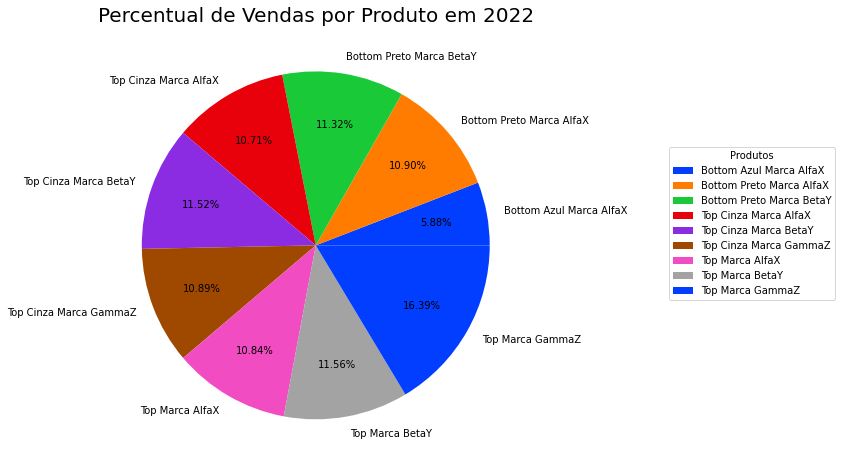

In [32]:
#define data
data = _tabela_produtos_vendidos_22['unidades_vendidas']
labels = _tabela_produtos_vendidos_22['descrição_produto']
label_ano = _df_22['ano'].unique()[0]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:8]

#create pie chart
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', pctdistance= 0.7, labeldistance= 1.1)
ax.set_title(f"Percentual de Vendas por Produto em {label_ano}", fontsize=20)
ax.legend(title="Produtos", loc="center left", bbox_to_anchor=(1.3, 0, 0.6, 1.1))

plt.show()

In [33]:
_df_23 =  _df[_df['ano']=='2023']
_df_23.head(2)

,id_trans,data,ano,mes,ano_mes,id_loja,id_produto,id_cliente,unidades_vendidas,valor_total,...,descrição_produto,categoria,cor,marca,uf,regiao,genero,faixa_idade,classe_social,preco
3903,3904,2023-01-01,2023,01,2023-01,3,123001,90016,3,74.97,...,Top Cinza Marca GammaZ,Top,Cinza,GammaZ,SP,SUDESTE,Feminino,35-45,E,24.99
3897,3898,2023-01-01,2023,01,2023-01,7,123003,90042,2,61.98,...,Top Marca BetaY,Top,Vermelho,BetaY,RS,SUL,Masculino,25-35,C,30.99


In [34]:

_tabela_produtos_vendidos_23 = _df_23.groupby(['descrição_produto'],as_index=False).agg({'unidades_vendidas':'sum'})
_tabela_produtos_vendidos_23['total_vendido'] = _tabela_produtos_vendidos_23['unidades_vendidas'].sum()
_tabela_produtos_vendidos_23['percentual_produto'] = _tabela_produtos_vendidos_23['unidades_vendidas'] / _tabela_produtos_vendidos_23['total_vendido']
_tabela_produtos_vendidos_23 = _tabela_produtos_vendidos_23.drop(columns=['total_vendido'])
_tabela_produtos_vendidos_23

,descrição_produto,unidades_vendidas,percentual_produto
0,Bottom BetaY,419,0.047068
1,Bottom GammaZ,857,0.096271
2,Bottom Preto Marca AlfaX,870,0.097731
3,Bottom Preto Marca BetaY,903,0.101438
4,Top Cinza Marca AlfaX,943,0.105931
5,Top Cinza Marca BetaY,929,0.104359
6,Top Cinza Marca GammaZ,455,0.051112
7,Top Marca AlfaX,887,0.099641
8,Top Marca BetaY,891,0.100090
9,Top Marca GammaZ,1748,0.196360


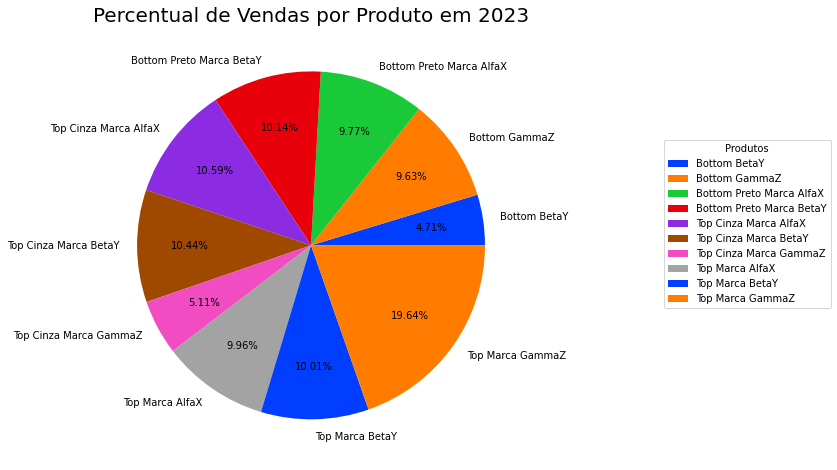

In [35]:
#define data
data = _tabela_produtos_vendidos_23['unidades_vendidas']
labels = _tabela_produtos_vendidos_23['descrição_produto']
label_ano = _df_23['ano'].unique()[0]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:8]

#create pie chart
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', pctdistance= 0.7, labeldistance= 1.1)
ax.set_title(f"Percentual de Vendas por Produto em {label_ano}", fontsize=20)
ax.legend(title="Produtos", loc="center left", bbox_to_anchor=(1.3, 0, 0.6, 1.1))

plt.show()

Em 2022 o produto mais vendido foi o Top Marca GammaZ com 16,98% de participação e em 2023 esse mesmo produto teve aumento registrando 19,64% aumento de 3,25%. 

Meses de comparação: 

In [36]:
_df_ano_mes_22 = _df_22['ano_mes'].unique()
_df_ano_mes_23 = _df_23['ano_mes'].unique()

print(f"Períodos 2022: {_df_ano_mes_22}\nPeríodos 2023: {_df_ano_mes_23}")

Períodos 2022: ['2022-01' '2022-02' '2022-03' '2022-04' '2022-05' '2022-06' '2022-07'
 '2022-08' '2022-09']
Períodos 2023: ['2023-01' '2023-02' '2023-03' '2023-04' '2023-05' '2023-06' '2023-07'
 '2023-08' '2023-09']


## Quantidade Vendidas por Categoria Cor e Marca somente com promoção ativa.

In [37]:
_tabela_cat_cor_marc_vendidos_22 = _df_22.groupby(['categoria', 'cor', 'marca'],as_index=False).agg({'unidades_vendidas':'sum'})
_tabela_cat_cor_marc_vendidos_22['total_vendido'] = _tabela_cat_cor_marc_vendidos_22['unidades_vendidas'].sum()
_tabela_cat_cor_marc_vendidos_22['percentual_produto'] = _tabela_cat_cor_marc_vendidos_22['unidades_vendidas'] / _tabela_cat_cor_marc_vendidos_22['total_vendido'] * 100
_tabela_cat_cor_marc_vendidos_22 = _tabela_cat_cor_marc_vendidos_22.drop(columns=['total_vendido'])
_tabela_cat_cor_marc_vendidos_22['sku'] = _tabela_cat_cor_marc_vendidos_22['categoria'] + '|' + _tabela_cat_cor_marc_vendidos_22['cor'] + '|' + _tabela_cat_cor_marc_vendidos_22['marca']
_tabela_cat_cor_marc_vendidos_22 = _tabela_cat_cor_marc_vendidos_22[['sku', 'unidades_vendidas', 'percentual_produto']]
_tabela_cat_cor_marc_vendidos_22

,sku,unidades_vendidas,percentual_produto
0,Bottom|Azul|AlfaX,531,5.875194
1,Bottom|Preto|AlfaX,985,10.898429
2,Bottom|Preto|BetaY,1023,11.318876
3,Top|Cinza|AlfaX,968,10.710334
4,Top|Cinza|BetaY,1041,11.518035
5,Top|Cinza|GammaZ,984,10.887364
6,Top|Vermelho|AlfaX,980,10.843107
7,Top|Vermelho|BetaY,1045,11.562293
8,Top|Vermelho|GammaZ,1481,16.386369


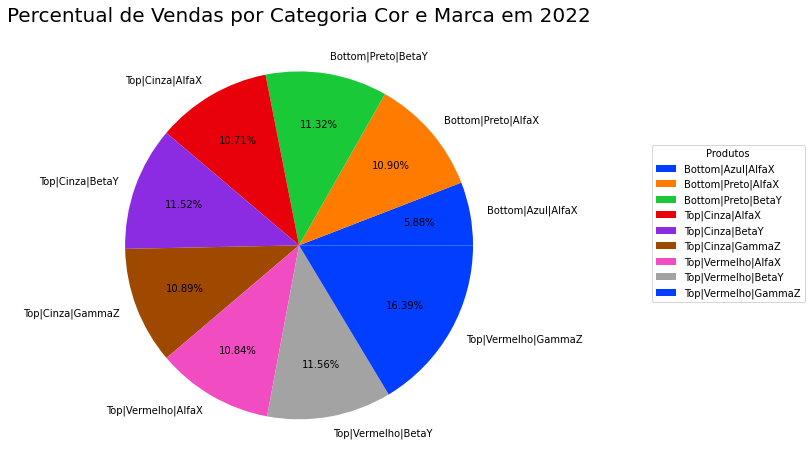

In [38]:
#define data
data = _tabela_cat_cor_marc_vendidos_22['unidades_vendidas']
labels = _tabela_cat_cor_marc_vendidos_22['sku']
label_ano = _df_22['ano'].unique()[0]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:8]

#create pie chart
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', pctdistance= 0.7, labeldistance= 1.1)
ax.set_title(f"Percentual de Vendas por Categoria Cor e Marca em {label_ano}", fontsize=20)
ax.legend(title="Produtos", loc="center left", bbox_to_anchor=(1.3, 0, 0.6, 1.1))

plt.show()

In [39]:
_tabela_cat_cor_marc_vendidos_23 = _df_23.groupby(['categoria', 'cor', 'marca'],as_index=False).agg({'unidades_vendidas':'sum'})
_tabela_cat_cor_marc_vendidos_23['total_vendido'] = _tabela_cat_cor_marc_vendidos_23['unidades_vendidas'].sum()
_tabela_cat_cor_marc_vendidos_23['percentual_produto'] = _tabela_cat_cor_marc_vendidos_23['unidades_vendidas'] / _tabela_cat_cor_marc_vendidos_23['total_vendido'] * 100
_tabela_cat_cor_marc_vendidos_23 = _tabela_cat_cor_marc_vendidos_23.drop(columns=['total_vendido'])
_tabela_cat_cor_marc_vendidos_23['sku'] = _tabela_cat_cor_marc_vendidos_23['categoria'] + '|' + _tabela_cat_cor_marc_vendidos_23['cor'] + '|' + _tabela_cat_cor_marc_vendidos_23['marca']
_tabela_cat_cor_marc_vendidos_23 = _tabela_cat_cor_marc_vendidos_23[['sku', 'unidades_vendidas', 'percentual_produto']]
_tabela_cat_cor_marc_vendidos_23

,sku,unidades_vendidas,percentual_produto
0,Bottom|Azul|BetaY,419,4.706807
1,Bottom|Azul|GammaZ,857,9.627050
2,Bottom|Preto|AlfaX,870,9.773085
3,Bottom|Preto|BetaY,903,10.143788
4,Top|Cinza|AlfaX,943,10.593125
5,Top|Cinza|BetaY,929,10.435857
6,Top|Cinza|GammaZ,455,5.111211
7,Top|Vermelho|AlfaX,887,9.964053
8,Top|Vermelho|BetaY,891,10.008987
9,Top|Vermelho|GammaZ,1748,19.636037


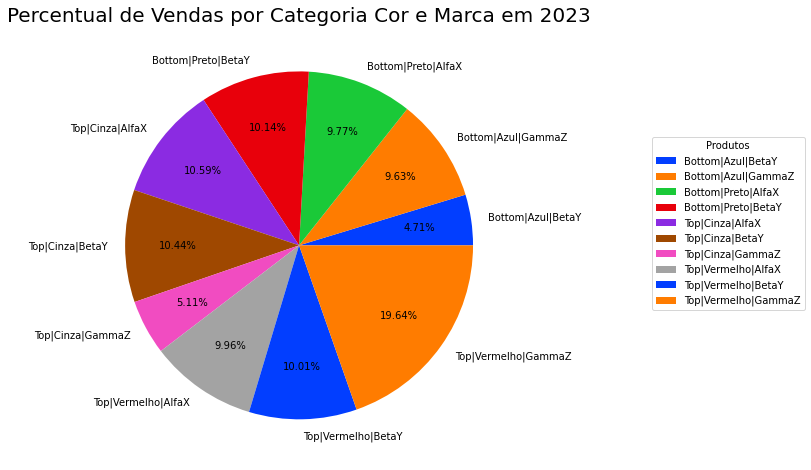

In [40]:
#define data
data = _tabela_cat_cor_marc_vendidos_23['unidades_vendidas']
labels = _tabela_cat_cor_marc_vendidos_23['sku']
label_ano = _df_23['ano'].unique()[0]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:8]

#create pie chart
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', pctdistance= 0.7, labeldistance= 1.1)
ax.set_title(f"Percentual de Vendas por Categoria Cor e Marca em {label_ano}", fontsize=20)
ax.legend(title="Produtos", loc="center left", bbox_to_anchor=(1.3, 0, 0.6, 1.1))

plt.show()

Ao Agruparmos por Categoria, Cor e Marca podemos ver que o percentual de pontos permanece em 3,25% indicando que o desconto no preço devido a promoção obeteve um incremento nas vendas.

## Receita 2022 e 2023 por Mês por Estado e Região

In [41]:
total_vendido_2022 = _df_22.groupby(['ano_mes', 'uf', 'regiao'], as_index=False).agg({'valor_total':'sum'})
total_vendido_2022.loc['Total', 'valor_total'] = total_vendido_2022['valor_total'].sum()
total_vendido_2022 = total_vendido_2022.fillna('')
total_vendido_2022 = total_vendido_2022.set_index(['ano_mes', 'uf', 'regiao'])
total_vendido_2022


valor_total
ano_mes uf regiao                   
2022-01 AM NORTE            2253.218
        BH NORDESTE         9828.066
        MG CENTRO-OESTE     4295.969
        RS SUL             10122.104
        SP SUDESTE         21539.473
2022-02 AM NORTE            1865.803
        BH NORDESTE         4975.316
        MG CENTRO-OESTE     3435.209
        RS SUL              6603.548
        SP SUDESTE         16607.990
2022-03 AM NORTE            4045.414
        BH NORDESTE        12152.878
        MG CENTRO-OESTE     7418.422
        RS SUL             14902.058
        SP SUDESTE         28818.340
2022-04 AM NORTE            2893.685
        BH NORDESTE         9775.328
        MG CENTRO-OESTE     5730.513
        RS SUL              8782.450
        SP SUDESTE         20998.636
2022-05 AM NORTE            2389.526
        BH NORDESTE         7448.523
        MG CENTRO-OESTE     6240.269
        RS SUL             11810.402
        SP SUDESTE         23872.876
2022-06 AM NORTE            2661.480
        BH NORDESTE         5335.953
        MG CENTRO-OESTE     4197.839
        RS SUL              7457.681
        SP SUDESTE         14005.801
2022-07 AM NORTE            2997.537
        BH NORDESTE         7638.462
        MG CENTRO-OESTE     5077.880
        RS SUL              9421.468
        SP SUDESTE         23307.623
2022-08 AM NORTE            2823.167
        BH NORDESTE         8280.032
        MG CENTRO-OESTE     5088.145
        RS SUL              9811.626
        SP SUDESTE         24765.564
2022-09 AM NORTE            3003.536
        BH NORDESTE         6868.071
        MG CENTRO-OESTE     5181.950
        RS SUL              8191.682
        SP SUDESTE         16874.039
                          421795.552

In [42]:
total_vendido_2023 = _df_23.groupby(['ano_mes', 'uf', 'regiao'], as_index=False).agg({'valor_total':'sum'})
total_vendido_2023.loc['Total', 'valor_total'] = total_vendido_2023['valor_total'].sum()
total_vendido_2023 = total_vendido_2023.fillna('')
total_vendido_2023 = total_vendido_2023.set_index(['ano_mes', 'uf', 'regiao'])
total_vendido_2023

valor_total
ano_mes uf regiao                   
2023-01 AM NORTE           2413.9060
        BH NORDESTE        7103.4575
        MG CENTRO-OESTE    4855.0930
        RS SUL            10494.8055
        SP SUDESTE        17507.7025
2023-02 AM NORTE           2046.5700
        BH NORDESTE        6162.8730
        MG CENTRO-OESTE    2251.2615
        RS SUL             8933.7730
        SP SUDESTE        18357.7195
2023-03 AM NORTE           2253.9650
        BH NORDESTE        6468.1950
        MG CENTRO-OESTE    6781.6480
        RS SUL            12280.0910
        SP SUDESTE        27021.6785
2023-04 AM NORTE           2787.3920
        BH NORDESTE        8192.0815
        MG CENTRO-OESTE    5006.2605
        RS SUL            10116.2640
        SP SUDESTE        19032.3025
2023-05 AM NORTE           3147.9390
        BH NORDESTE        6803.1320
        MG CENTRO-OESTE    6659.9790
        RS SUL             8808.3040
        SP SUDESTE        20639.0245
2023-06 AM NORTE           3938.1490
        BH NORDESTE       12804.4005
        MG CENTRO-OESTE    6005.6405
        RS SUL            14857.5260
        SP SUDESTE        26648.6085
2023-07 AM NORTE           3279.5755
        BH NORDESTE       10876.0535
        MG CENTRO-OESTE    6175.2820
        RS SUL            11614.5040
        SP SUDESTE        26082.2125
2023-08 AM NORTE           2271.4145
        BH NORDESTE       10113.8455
        MG CENTRO-OESTE    6579.0565
        RS SUL            11069.4485
        SP SUDESTE        23009.5055
2023-09 AM NORTE           2743.3145
        BH NORDESTE       10997.9890
        MG CENTRO-OESTE    9834.1195
        RS SUL            15483.1985
        SP SUDESTE        26907.5405
                         467416.8025

In [43]:
total_2022 = total_vendido_2022.reset_index()
total_2023 = total_vendido_2023.reset_index()
valor_percentual = ((total_2023.loc[45, 'valor_total'] / total_2022.loc[45, 'valor_total'] ) - 1) * 100
valor_absoluto =  (total_2023.loc[45, 'valor_total'] - total_2022.loc[45, 'valor_total'] )

flag = 'maior' if valor_percentual > 0  else 'menor'

string = f"O percentual do ano atual é {flag} em relação ao ano anterior é de {valor_percentual:.2f} e o valor absoluto {valor_absoluto:.2f}"

print(string.replace('.',','))

O percentual do ano atual é maior em relação ao ano anterior é de 10,82 e o valor absoluto 45621,25


## Vendas por Mês 

In [44]:
total_mes_2022 = total_vendido_2022.reset_index()
total_mes_2022 = total_mes_2022.drop(45,axis=0)
total_mes_2022 = total_mes_2022.groupby(['ano_mes']).agg({'valor_total':'sum'})
total_mes_2022

,valor_total
ano_mes,
2022-01,48038.830
2022-02,33487.866
2022-03,67337.112
2022-04,48180.612
2022-05,51761.596
2022-06,33658.754
2022-07,48442.970
2022-08,50768.534
2022-09,40119.278


In [45]:
total_mes_2023 = total_vendido_2023.reset_index()
total_mes_2023 = total_mes_2023.drop(45,axis=0)
total_mes_2023 = total_mes_2023.groupby(['ano_mes']).agg({'valor_total':'sum'})
total_mes_2023

,valor_total
ano_mes,
2023-01,42374.9645
2023-02,37752.1970
2023-03,54805.5775
2023-04,45134.3005
2023-05,46058.3785
2023-06,64254.3245
2023-07,58027.6275
2023-08,53043.2705
2023-09,65966.1620


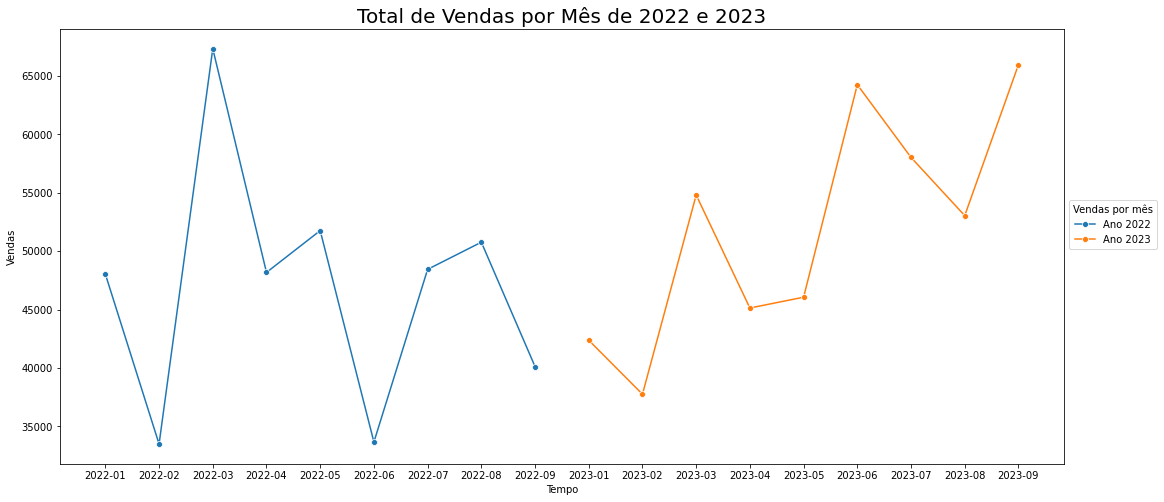

In [46]:
#define data
total_mes_2022 = total_mes_2022.reset_index()
total_mes_2023 = total_mes_2023.reset_index()

label_ano_ant = _df_22['ano'].unique()[0]
label_ano_atu = _df_23['ano'].unique()[0]


fig, ax = plt.subplots(figsize=(18, 8), facecolor='white')
# plt.figure( figsize = ( 12, 5)) 
sns.lineplot(x = 'ano_mes', 
             y = 'valor_total',
             marker='o', 
             data = total_mes_2022,
             label = f"Ano {label_ano_ant}") 
sns.lineplot(x = 'ano_mes', 
             y = 'valor_total',
             marker='o', 
             data = total_mes_2023,
             label = f"Ano {label_ano_atu}") 


plt.ylabel('Vendas') 
plt.xlabel('Tempo') 
pos = total_mes_2022['ano_mes'].to_list() + total_mes_2023['ano_mes'].to_list()

ax.set_title(f"Total de Vendas por Mês de {label_ano_ant} e {label_ano_atu}", fontsize=20)
ax.legend(title="Vendas por mês", loc="center left", bbox_to_anchor=(1, 0, 0.6, 1.1))
plt.xticks(pos)   
plt.show()


No Gráfico acima podemos ver que o mês de maior sazionalidade  é o mês de fevereiro. 

## Ticket Médio por Ano

In [47]:
tkm_2022 = _df_22.groupby(['ano_mes'], as_index=False).agg({'id_cliente':'count', 'valor_total':'sum'})
tkm_2022['tkm_medio'] = tkm_2022['valor_total'] / tkm_2022['id_cliente']
tkm_2022

,ano_mes,id_cliente,valor_total,tkm_medio
0,2022-01,444,48038.830,108.195563
1,2022-02,313,33487.866,106.989987
2,2022-03,613,67337.112,109.848470
3,2022-04,447,48180.612,107.786604
4,2022-05,456,51761.596,113.512272
5,2022-06,302,33658.754,111.452828
6,2022-07,457,48442.970,106.002123
7,2022-08,486,50768.534,104.462004
8,2022-09,358,40119.278,112.065022


In [48]:
tkm_2023 = _df_23.groupby(['ano_mes'], as_index=False).agg({'id_cliente':'count', 'valor_total':'sum'})
tkm_2023['tkm_medio'] = tkm_2023['valor_total'] / tkm_2023['id_cliente']
tkm_2023

,ano_mes,id_cliente,valor_total,tkm_medio
0,2023-01,379,42374.9645,111.807294
1,2023-02,335,37752.1970,112.693125
2,2023-03,447,54805.5775,122.607556
3,2023-04,384,45134.3005,117.537241
4,2023-05,387,46058.3785,119.013898
5,2023-06,521,64254.3245,123.328838
6,2023-07,479,58027.6275,121.143272
7,2023-08,429,53043.2705,123.643987
8,2023-09,554,65966.1620,119.072495


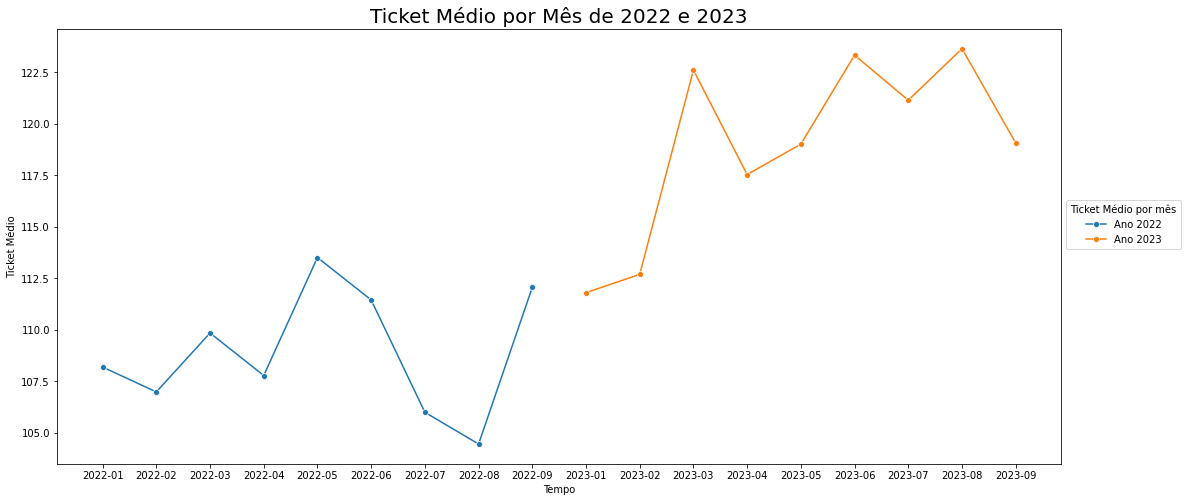

In [49]:
#define data
tkm_mes_2022 = tkm_2022
tkm_mes_2023 = tkm_2023

label_ano_ant = _df_22['ano'].unique()[0]
label_ano_atu = _df_23['ano'].unique()[0]


fig, ax = plt.subplots(figsize=(18, 8), facecolor='white')
# plt.figure( figsize = ( 12, 5)) 
sns.lineplot(x = 'ano_mes', 
             y = 'tkm_medio',
             marker='o', 
             data = tkm_mes_2022,
             label = f"Ano {label_ano_ant}") 
sns.lineplot(x = 'ano_mes', 
             y = 'tkm_medio',
             marker='o', 
             data = tkm_mes_2023,
             label = f"Ano {label_ano_atu}") 


plt.ylabel('Ticket Médio') 
plt.xlabel('Tempo') 
pos = total_mes_2022['ano_mes'].to_list() + total_mes_2023['ano_mes'].to_list()

ax.set_title(f"Ticket Médio por Mês de {label_ano_ant} e {label_ano_atu}", fontsize=20)
ax.legend(title="Ticket Médio por mês", loc="center left", bbox_to_anchor=(1, 0, 0.6, 1.1))
plt.xticks(pos)   
plt.show()


Podemos ver que o ano de 2023 teve um ticket médio superior ao de 2022 justificando o aumento das vendas.

## Valor Gasto por Cliente por mês

In [50]:
_df.columns


Index(['id_trans', 'data', 'ano', 'mes', 'ano_mes', 'id_loja', 'id_produto',
       'id_cliente', 'unidades_vendidas', 'valor_total', 'promo',
       'descrição_produto', 'categoria', 'cor', 'marca', 'uf', 'regiao',
       'genero', 'faixa_idade', 'classe_social', 'preco'],
      dtype='object')

In [51]:
clientes_2022 = _df[_df['ano']=='2022']
clientes_2023 = _df[_df['ano']=='2023']

### Distribuição e Fequencia da população por Gênero 

In [52]:
frequencia_22 = clientes_2022['genero'].value_counts()
frequencia_22

Feminino          2469
Masculino         1149
não_cadastrado     258
Name: genero, dtype: int64

In [53]:
percentual_22 = clientes_2022['genero'].value_counts(normalize = True) * 100
percentual_22

Feminino          63.699690
Masculino         29.643963
não_cadastrado     6.656347
Name: genero, dtype: float64

In [54]:
distr_freq_qualitativas_22 = pd.DataFrame({'Frequência': frequencia_22, 'Porcentagem (%)':percentual_22}).reset_index(drop=True)
distr_freq_qualitativas_22.rename(index= {0:'Feminino', 1:'Masculino', 2:'Não Cadastrados'}, inplace=True)
distr_freq_qualitativas_22.rename_axis('Sexo', axis= 'columns', inplace=True)
distr_freq_qualitativas_22

Sexo,Frequência,Porcentagem (%)
Feminino,2469,63.699690
Masculino,1149,29.643963
Não Cadastrados,258,6.656347


<AxesSubplot:>

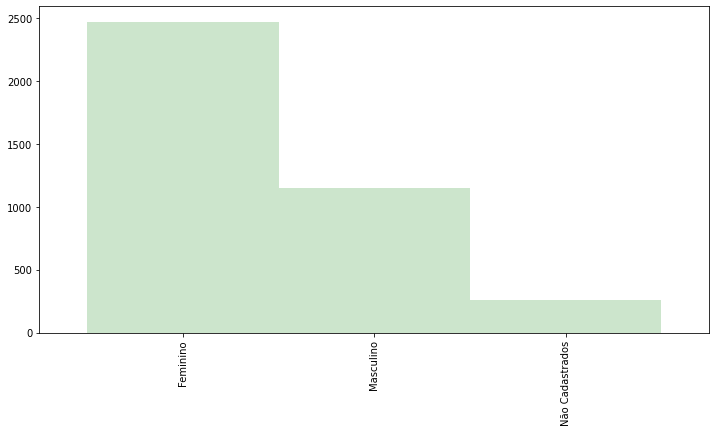

In [55]:
distr_freq_qualitativas_22['Frequência'].plot.bar(width=1, color = 'green', alpha=0.2, figsize=(12,6))


In [56]:
frequencia_23 = clientes_2023['genero'].value_counts()
frequencia_23

Feminino          2460
Masculino         1173
não_cadastrado     282
Name: genero, dtype: int64

In [57]:
percentual_23 = clientes_2023['genero'].value_counts(normalize = True) * 100
percentual_23

Feminino          62.835249
Masculino         29.961686
não_cadastrado     7.203065
Name: genero, dtype: float64

In [58]:
distr_freq_qualitativas_23 = pd.DataFrame({'Frequência': frequencia_23, 'Porcentagem (%)':percentual_23}).reset_index(drop=True)
distr_freq_qualitativas_23.rename(index= {0:'Feminino', 1:'Masculino', 2:'Não Cadastrados'}, inplace=True)
distr_freq_qualitativas_23.rename_axis('Sexo', axis= 'columns', inplace=True)
distr_freq_qualitativas_23

Sexo,Frequência,Porcentagem (%)
Feminino,2460,62.835249
Masculino,1173,29.961686
Não Cadastrados,282,7.203065


<AxesSubplot:>

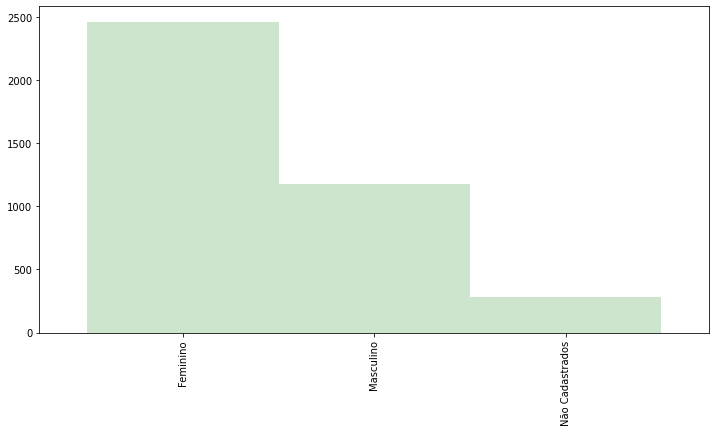

In [59]:
distr_freq_qualitativas_23['Frequência'].plot.bar(width=1, color = 'green', alpha=0.2, figsize=(12,6))

### Frequênci por Faixa Etária e Classe

In [60]:
frequencia_classe_22 = clientes_2022['classe_social'].value_counts()
frequencia_classe_22

C    2023
D     563
B     448
A     440
E     402
Name: classe_social, dtype: int64

In [61]:
percentual_classe_22 = clientes_2022['classe_social'].value_counts(normalize = True) * 100
percentual_classe_22

C    52.192982
D    14.525284
B    11.558308
A    11.351909
E    10.371517
Name: classe_social, dtype: float64

In [62]:
distr_freq_qualitativas_classe_22 = pd.DataFrame({'Frequência': frequencia_classe_22, 'Porcentagem (%)':percentual_classe_22})
distr_freq_qualitativas_classe_22.rename_axis('Classe', axis= 'columns', inplace=True)
distr_freq_qualitativas_classe_22

Classe,Frequência,Porcentagem (%)
C,2023,52.192982
D,563,14.525284
B,448,11.558308
A,440,11.351909
E,402,10.371517


<AxesSubplot:>

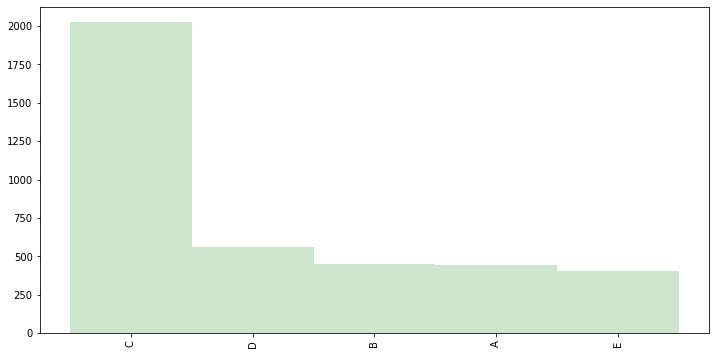

In [63]:
distr_freq_qualitativas_classe_22['Frequência'].plot.bar(width=1, color = 'green', alpha=0.2, figsize=(12,6))

In [64]:
frequencia_faixa_22 = clientes_2022['faixa_idade'].value_counts()
frequencia_faixa_22

25-35    1926
35-45    1164
18-25     436
45+       350
Name: faixa_idade, dtype: int64

In [65]:
percentual_faixa_22 = clientes_2022['faixa_idade'].value_counts(normalize = True) * 100
percentual_faixa_22

25-35    49.690402
35-45    30.030960
18-25    11.248710
45+       9.029928
Name: faixa_idade, dtype: float64

In [66]:
distr_freq_qualitativas_faixa_22 = pd.DataFrame({'Frequência': frequencia_faixa_22, 'Porcentagem (%)':percentual_faixa_22})
distr_freq_qualitativas_faixa_22.rename_axis('Classe', axis= 'columns', inplace=True)
distr_freq_qualitativas_faixa_22

Classe,Frequência,Porcentagem (%)
25-35,1926,49.690402
35-45,1164,30.030960
18-25,436,11.248710
45+,350,9.029928


<AxesSubplot:>

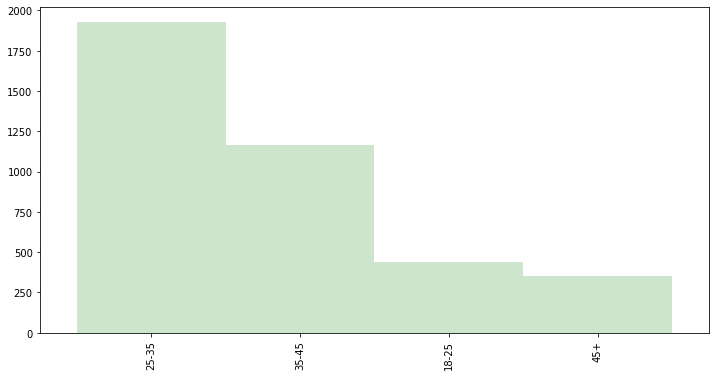

In [67]:
distr_freq_qualitativas_faixa_22['Frequência'].plot.bar(width=1, color = 'green', alpha=0.2, figsize=(12,6))

In [68]:
frequencia_classe_23 = clientes_2023['classe_social'].value_counts()
frequencia_classe_23

C    2077
D     574
B     449
A     433
E     382
Name: classe_social, dtype: int64

In [69]:
percentual_classe_23 = clientes_2023['classe_social'].value_counts(normalize = True) * 100
percentual_classe_23

C    53.052363
D    14.661558
B    11.468710
A    11.060026
E     9.757344
Name: classe_social, dtype: float64

In [70]:
distr_freq_qualitativas_classe_23 = pd.DataFrame({'Frequência': frequencia_classe_23, 'Porcentagem (%)':percentual_classe_23})
distr_freq_qualitativas_classe_23.rename_axis('Classe', axis= 'columns', inplace=True)
distr_freq_qualitativas_classe_23

Classe,Frequência,Porcentagem (%)
C,2077,53.052363
D,574,14.661558
B,449,11.468710
A,433,11.060026
E,382,9.757344


<AxesSubplot:>

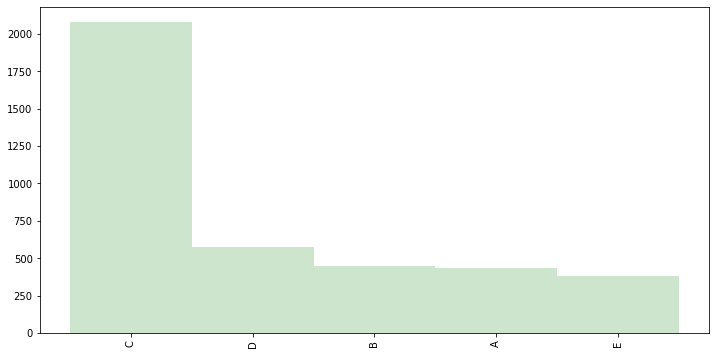

In [71]:
distr_freq_qualitativas_classe_23['Frequência'].plot.bar(width=1, color = 'green', alpha=0.2, figsize=(12,6))


In [72]:
frequencia_faixa_23 = clientes_2023['faixa_idade'].value_counts()
frequencia_faixa_23

25-35    1978
35-45    1193
18-25     424
45+       320
Name: faixa_idade, dtype: int64

In [73]:
percentual_faixa_23 = clientes_2023['faixa_idade'].value_counts(normalize = True) * 100
percentual_faixa_23

25-35    50.523627
35-45    30.472542
18-25    10.830140
45+       8.173691
Name: faixa_idade, dtype: float64

In [74]:
distr_freq_qualitativas_faixa_23 = pd.DataFrame({'Frequência': frequencia_faixa_23, 'Porcentagem (%)':percentual_faixa_23})
distr_freq_qualitativas_faixa_23.rename_axis('Classe', axis= 'columns', inplace=True)
distr_freq_qualitativas_faixa_23

Classe,Frequência,Porcentagem (%)
25-35,1978,50.523627
35-45,1193,30.472542
18-25,424,10.830140
45+,320,8.173691


<AxesSubplot:>

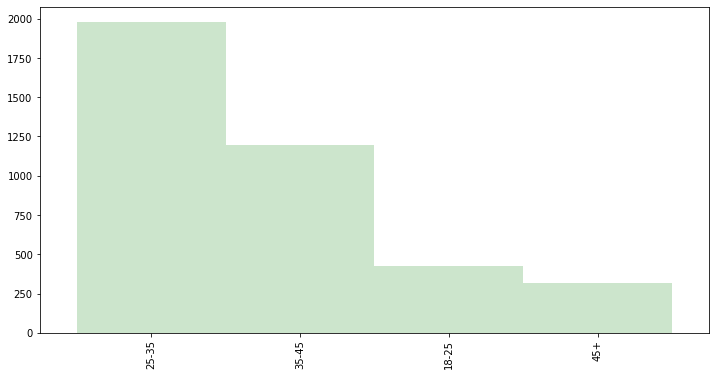

In [75]:
distr_freq_qualitativas_faixa_23['Frequência'].plot.bar(width=1, color = 'green', alpha=0.2, figsize=(12,6))

Podemos concluir que o público alvo são mulheres na faixa etária de 25 a 35 anos da classe C, pois esse público apresenta um valor de compra superior aos das demais classes.

### Tabela de Cliente por Estado|Região|Gênero|Faixa de Idade|Classe por Ano

In [76]:
gasto_por_cliente_2022 = clientes_2022.groupby(['ano_mes', 'uf', 'regiao', 'genero',  'faixa_idade', 'classe_social']).agg({'valor_total':'sum', 'id_cliente':'count'})
gasto_por_cliente_2022['tkm_medio'] = gasto_por_cliente_2022['valor_total'] / gasto_por_cliente_2022['id_cliente']
gasto_por_cliente_2022.head(30)

valor_total  \
ano_mes uf regiao   genero         faixa_idade classe_social                
2022-01 AM NORTE    Feminino       18-25       B                  143.960   
                                   25-35       A                   71.980   
                                               B                  221.562   
                                               C                  479.861   
                                               E                   70.173   
                                   35-45       B                   46.782   
                                               C                  149.970   
                                               D                  151.173   
                                   45+         D                  107.970   
                    Masculino      18-25       E                   83.970   
                                   25-35       A                  149.544   
                                               B                   91.990   
                                               C                  339.932   
                                   35-45       C                   32.391   
                    não_cadastrado 25-35       C                  111.960   
        BH NORDESTE Feminino       18-25       B                   83.970   
                                               C                  335.940   
                                   25-35       A                  327.522   
                                               B                  219.960   
                                               C                 1571.746   
                                               D                  269.960   
                                               E                  335.950   
                                   35-45       A                  103.563   
                                               B                  419.940   
                                               C                  849.834   
                                               D                  456.712   
                                               E                  177.960   
                                   45+         C                  111.980   
                    Masculino      18-25       A                   49.990   
                                               C                  131.553   

                                                              id_cliente  \
ano_mes uf regiao   genero         faixa_idade classe_social               
2022-01 AM NORTE    Feminino       18-25       B                       1   
                                   25-35       A                       1   
                                               B                       2   
                                               C                       6   
                                               E                       1   
                                   35-45       B                       1   
                                               C                       1   
                                               D                       1   
                                   45+         D                       1   
                    Masculino      18-25       E                       1   
                                   25-35       A                       2   
                                               B                       1   
                                               C                       4   
                                   35-45       C                       1   
                    não_cadastrado 25-35       C                       2   
        BH NORDESTE Feminino       18-25       B                       1   
                                               C                       4   
                                   25-35       A                       4   
                                               B                       2   
 

In [77]:
gasto_por_cliente_2023 = clientes_2023.groupby(['ano_mes', 'uf', 'regiao', 'genero',  'faixa_idade', 'classe_social']).agg({'valor_total':'sum', 'id_cliente':'count'})
gasto_por_cliente_2023['tkm_medio'] = gasto_por_cliente_2023['valor_total'] / gasto_por_cliente_2023['id_cliente']
gasto_por_cliente_2023.head(30)

valor_total  \
ano_mes uf regiao   genero         faixa_idade classe_social                
2023-01 AM NORTE    Feminino       18-25       B                 179.9800   
                                   25-35       A                 109.9800   
                                               C                 357.9200   
                                               D                  27.9900   
                                   35-45       A                 179.9800   
                                               B                  54.9900   
                                               C                 206.3360   
                                               D                  71.9800   
                                               E                  85.9800   
                                   45+         D                 107.9700   
                    Masculino      18-25       C                 179.9800   
                                               D                 109.9800   
                                   25-35       A                 251.9600   
                                               C                 256.9200   
                                   45+         C                  71.9800   
                    não_cadastrado 25-35       C                 159.9800   
        BH NORDESTE Feminino       18-25       C                 257.9030   
                                   25-35       A                 606.8600   
                                               B                 324.9500   
                                               C                1258.5845   
                                               D                 723.8700   
                                               E                  54.9900   
                                   35-45       A                  55.9800   
                                               B                 221.9400   
                                               C                1114.8000   
                                               D                 437.9400   
                                               E                 179.9800   
                    Masculino      18-25       C                 269.9700   
                                               D                 300.9600   
                                               E                 179.9800   

                                                              id_cliente  \
ano_mes uf regiao   genero         faixa_idade classe_social               
2023-01 AM NORTE    Feminino       18-25       B                       1   
                                   25-35       A                       1   
                                               C                       5   
                                               D                       1   
                                   35-45       A                       1   
                                               B                       1   
                                               C                       2   
                                               D                       1   
                                               E                       1   
                                   45+         D                       1   
                    Masculino      18-25       C                       1   
                                               D                       1   
                                   25-35       A                       2   
                                               C                       3   
                                   45+         C                       1   
                    não_cadastrado 25-35       C                       1   
        BH NORDESTE Feminino       18-25       C                       5   
                                   25-35       A                       6   
                                               B                       3   
 